<a href="https://colab.research.google.com/github/sssiyam-sudo/MasterThesisWork/blob/main/Copy_of_zScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary libraries & packages.

In [1]:
import networkx as nx
import os
import pandas as pd
import numpy as np
import math
from math import sqrt
import scipy.stats
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.pyplot import figure
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing 

!pip install pingouin
import pingouin as pg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=2b25847b47fbd36a9d8508363105178c1a5af98ae8985da4b5d37fc21dda7fa2
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [2]:
df = pd.read_csv('/content/drive/MyDrive/ThesisWork/nsclc_pd1_msk_2018_clinical_data.tsv', sep='\t')

#-----------------
#-----------------
#-----------------

-------------------------------------
## **Data exploration and cleaning.**
-------------------------------------

In [3]:
df.head()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,Durable Clinical Benefit,FGA,Fraction Genome Altered,Gene Panel,...,Oncotree Code,PD-L1 Score (%),Progress Free Survival (Months),Progression Free Status,Number of Samples Per Patient,Sex,Smoker,Somatic Status,TMB (nonsynonymous),Treatment Type
0,nsclc_pd1_msk_2018,P-0000012,P-0000012-T03-IM3,58,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,YES,0.18,0.1844,IMPACT341,...,LUAD,NaN,27.20,0:Not Progressed,1,Female,Ever,Matched,32.165504,Combination
1,nsclc_pd1_msk_2018,P-0000082,P-0000082-T01-IM3,60,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,YES,0.36,0.3606,IMPACT341,...,LUAD,100.0,14.50,1:Progressed,1,Male,Ever,Matched,1.109155,Monotherapy
2,nsclc_pd1_msk_2018,P-0000208,P-0000208-T01-IM3,68,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NO,0.12,0.1173,IMPACT341,...,LUAD,3.0,4.17,1:Progressed,1,Female,Ever,Matched,2.218311,Monotherapy
3,nsclc_pd1_msk_2018,P-0000235,P-0000235-T01-IM3,77,Non-Small Cell Lung Cancer,Lung Squamous Cell Carcinoma,NO,0.24,0.2380,IMPACT341,...,LUSC,NaN,0.60,1:Progressed,1,Male,Ever,Matched,8.873242,Monotherapy
4,nsclc_pd1_msk_2018,P-0000299,P-0000299-T01-IM3,66,Non-Small Cell Lung Cancer,Large Cell Neuroendocrine Carcinoma,NO,0.01,0.0051,IMPACT341,...,LUNE,NaN,1.63,1:Progressed,1,Male,Ever,Matched,7.764087,Combination


In [4]:
df.rename(columns = {'Study ID':'Study_ID', 'Patient ID':'Patient_ID',
                     'Sample ID':'Sample_ID' , 'Diagnosis Age':'Diagnosis_Age' ,
                     'Cancer Type':'CancerType' , 'Cancer Type Detailed':'Cancer_Type_Detailed' ,
                     'Durable Clinical Benefit':'Durable_Clinical_Benefit' , 'FGA':'FGA' , 
                     'Fraction Genome Altered':'Fraction_Genome_Altered' , 'Gene Panel':'GenePanel',
                     'Lines of treatment':'Linesoftreatment' , 'Mutation Count':'MutationCount' , 
                     'Mutation Rate':'Mutation_Rate' , 'Oncotree Code':'OncotreeCode', 
                     'PD-L1 Score (%)':'PD-L1Score%' , 'Progress Free Survival (Months)':'ProgressFreeSurvival_Months' ,
                     'Progression Free Status':'Progression' ,
                     'Number of Samples Per Patient':'Number_of_Samples_Per_Patient' , 'Sex':'Gender' ,
                     'Smoker':'Smoker' , 'Somatic Status':'SomaticStatus' , 'TMB (nonsynonymous)':'TMB',
                     'Treatment Type':'TreatmentType'}, inplace = True)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study_ID                       240 non-null    object 
 1   Patient_ID                     240 non-null    object 
 2   Sample_ID                      240 non-null    object 
 3   Diagnosis_Age                  240 non-null    int64  
 4   CancerType                     240 non-null    object 
 5   Cancer_Type_Detailed           240 non-null    object 
 6   Durable_Clinical_Benefit       240 non-null    object 
 7   FGA                            240 non-null    float64
 8   Fraction_Genome_Altered        240 non-null    float64
 9   GenePanel                      240 non-null    object 
 10  IRB                            240 non-null    object 
 11  Linesoftreatment               240 non-null    int64  
 12  MutationCount                  240 non-null    int

<Axes: >

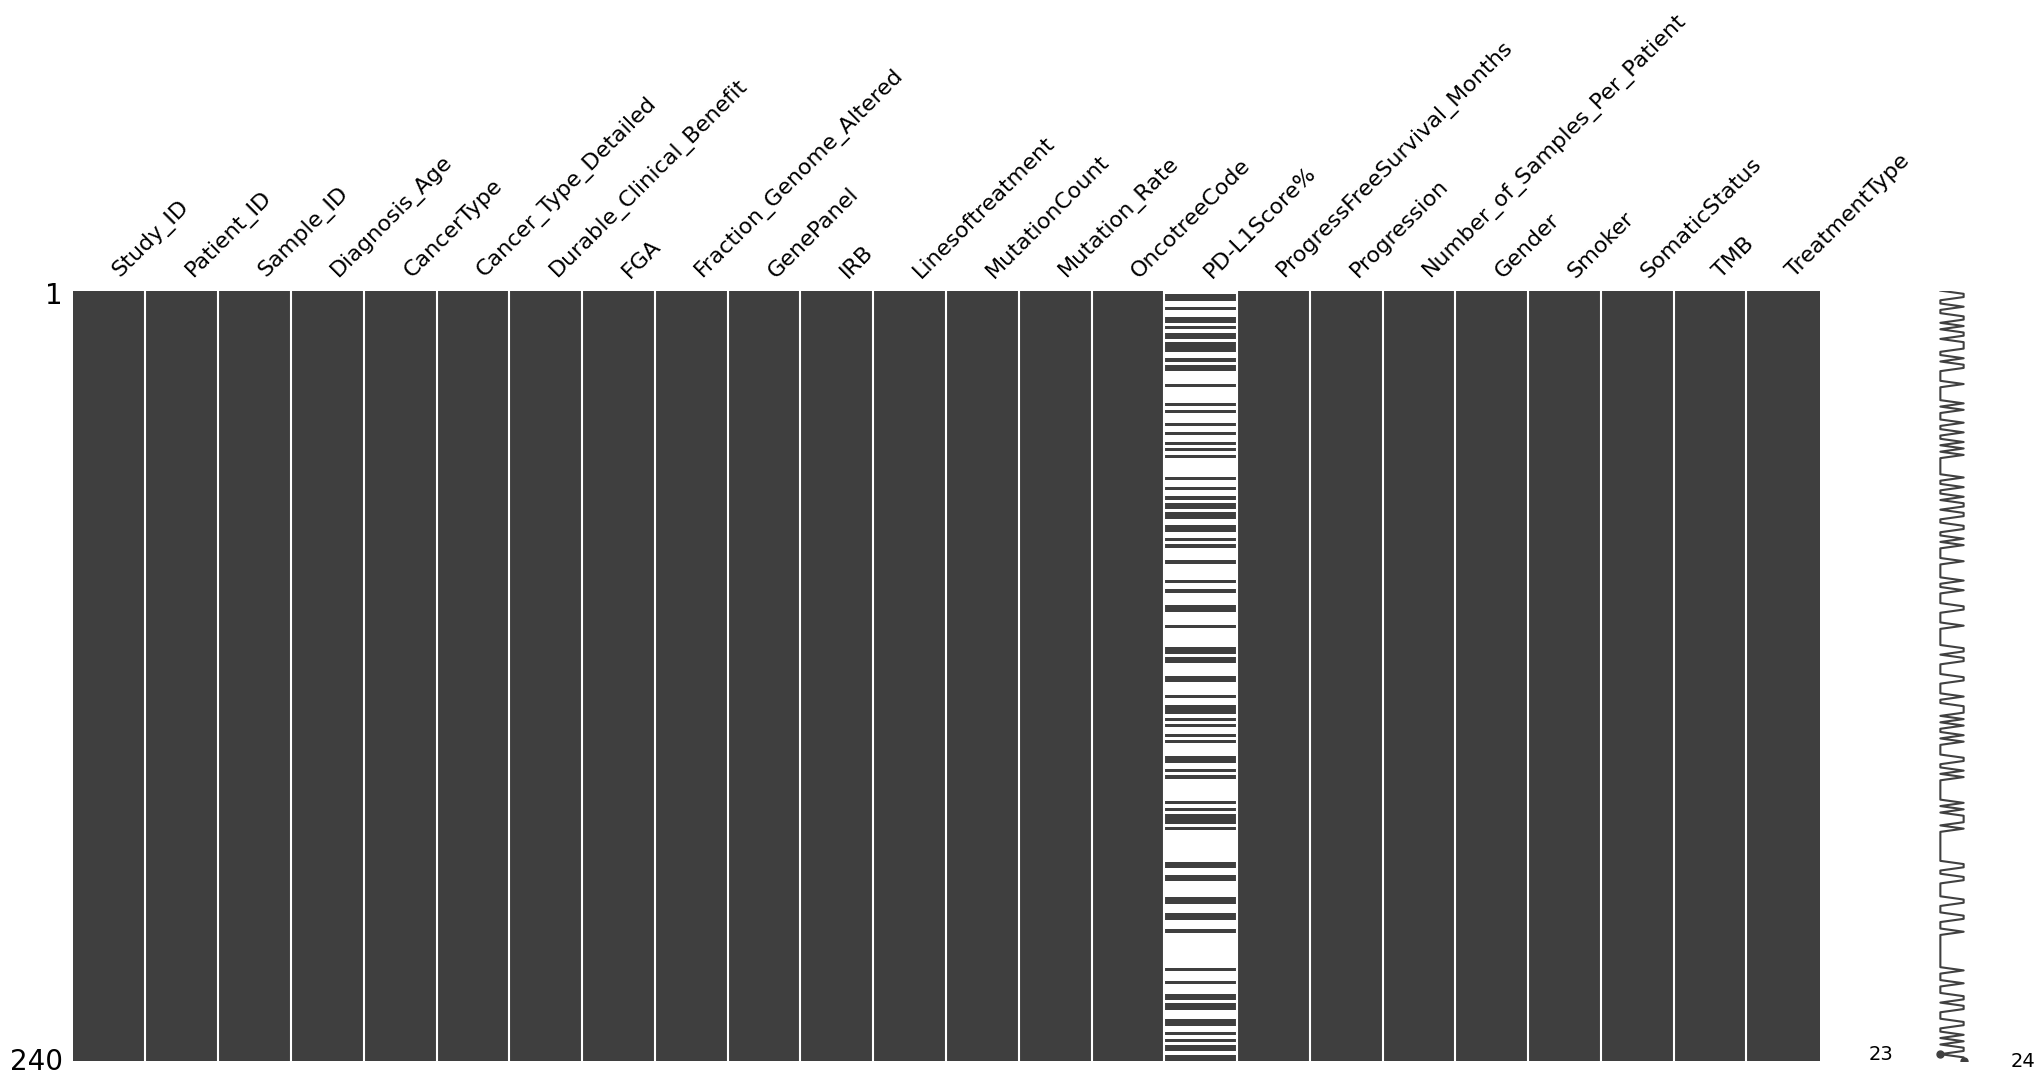

In [6]:
msno.matrix(df)

In [7]:
#removing uneffective columns
df.drop(df.columns[[0,1,2,4,5,15,17,18,21]], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis_Age                240 non-null    int64  
 1   Durable_Clinical_Benefit     240 non-null    object 
 2   FGA                          240 non-null    float64
 3   Fraction_Genome_Altered      240 non-null    float64
 4   GenePanel                    240 non-null    object 
 5   IRB                          240 non-null    object 
 6   Linesoftreatment             240 non-null    int64  
 7   MutationCount                240 non-null    int64  
 8   Mutation_Rate                240 non-null    float64
 9   OncotreeCode                 240 non-null    object 
 10  ProgressFreeSurvival_Months  240 non-null    float64
 11  Gender                       240 non-null    object 
 12  Smoker                       240 non-null    object 
 13  TMB                 

In [9]:
df.head()

,Diagnosis_Age,Durable_Clinical_Benefit,FGA,Fraction_Genome_Altered,GenePanel,IRB,Linesoftreatment,MutationCount,Mutation_Rate,OncotreeCode,ProgressFreeSurvival_Months,Gender,Smoker,TMB,TreatmentType
0,58,YES,0.18,0.1844,IMPACT341,Clinical trial,1,30,30.612245,LUAD,27.20,Female,Ever,32.165504,Combination
1,60,YES,0.36,0.3606,IMPACT341,Clinical trial,4,1,1.020408,LUAD,14.50,Male,Ever,1.109155,Monotherapy
2,68,NO,0.12,0.1173,IMPACT341,Clinical trial,1,2,2.040816,LUAD,4.17,Female,Ever,2.218311,Monotherapy
3,77,NO,0.24,0.2380,IMPACT341,Commercial,3,8,8.163265,LUSC,0.60,Male,Ever,8.873242,Monotherapy
4,66,NO,0.01,0.0051,IMPACT341,Clinical trial,2,7,7.142857,LUNE,1.63,Male,Ever,7.764087,Combination


In [10]:
label_encoder = preprocessing.LabelEncoder()

cols = ['Durable_Clinical_Benefit','GenePanel','IRB','OncotreeCode','Gender','Smoker','TMB','TreatmentType']
# sklearn labelencoder
df[cols] = df[cols].apply(preprocessing.LabelEncoder().fit_transform)

In [11]:
df.head()

,Diagnosis_Age,Durable_Clinical_Benefit,FGA,Fraction_Genome_Altered,GenePanel,IRB,Linesoftreatment,MutationCount,Mutation_Rate,OncotreeCode,ProgressFreeSurvival_Months,Gender,Smoker,TMB,TreatmentType
0,58,2,0.18,0.1844,0,0,1,30,30.612245,0,27.20,0,0,58,0
1,60,2,0.36,0.3606,0,0,4,1,1.020408,0,14.50,1,0,2,1
2,68,1,0.12,0.1173,0,0,1,2,2.040816,0,4.17,0,0,5,1
3,77,1,0.24,0.2380,0,1,3,8,8.163265,2,0.60,1,0,23,1
4,66,1,0.01,0.0051,0,0,2,7,7.142857,1,1.63,1,0,19,0


## **Redundancy analysis.**

In [12]:
featureDF = df.drop('Durable_Clinical_Benefit', axis = 1)

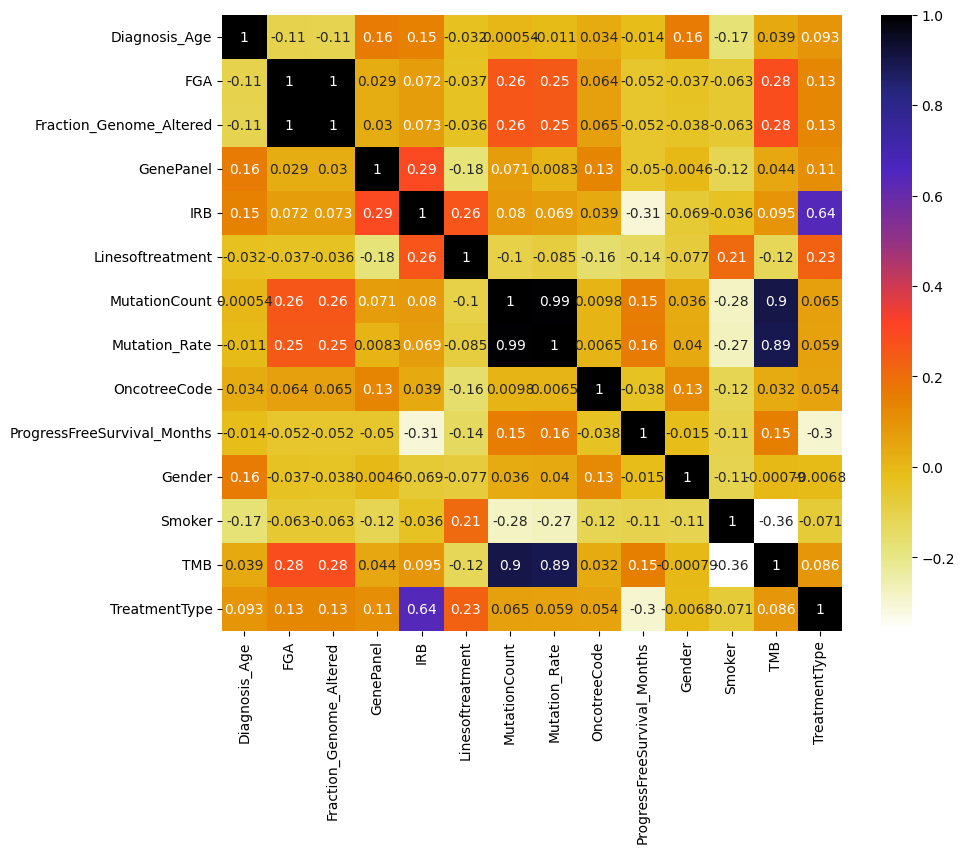

In [13]:
import seaborn as sns
plt.figure(figsize=(10,8))
cor = featureDF.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [14]:
def redundancy(dataset,threshold):
  col_corr = set() #set of all the name of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold: #considering the absolute values
        colname = corr_matrix.columns[i] #getting the name of the columns
        col_corr.add(colname)
  return col_corr

In [15]:
redundance_features = redundancy(featureDF,.85)
redundance_features

{'Fraction_Genome_Altered', 'Mutation_Rate', 'TMB'}

In [16]:
df.drop(redundance_features, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis_Age                240 non-null    int64  
 1   Durable_Clinical_Benefit     240 non-null    int64  
 2   FGA                          240 non-null    float64
 3   GenePanel                    240 non-null    int64  
 4   IRB                          240 non-null    int64  
 5   Linesoftreatment             240 non-null    int64  
 6   MutationCount                240 non-null    int64  
 7   OncotreeCode                 240 non-null    int64  
 8   ProgressFreeSurvival_Months  240 non-null    float64
 9   Gender                       240 non-null    int64  
 10  Smoker                       240 non-null    int64  
 11  TreatmentType                240 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 22.6 KB


#---------------------------------



## **Dividing the dataset for RESPONDER vs NONRESPONDER patients**





#---------------------------------

In [17]:
responder = df[(df['Durable_Clinical_Benefit'] == 2 )]
responder

,Diagnosis_Age,Durable_Clinical_Benefit,FGA,GenePanel,IRB,Linesoftreatment,MutationCount,OncotreeCode,ProgressFreeSurvival_Months,Gender,Smoker,TreatmentType
0,58,2,0.18,0,0,1,30,0,27.20,0,0,0
1,60,2,0.36,0,0,4,1,0,14.50,1,0,1
9,57,2,0.03,0,0,1,4,0,11.83,1,1,0
13,73,2,0.47,0,0,1,6,0,10.00,0,0,1
18,65,2,0.00,0,0,1,11,0,22.43,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
224,63,2,0.57,2,1,2,17,2,8.83,1,0,1
226,83,2,0.08,2,1,1,33,0,6.03,1,0,1
228,67,2,0.20,2,1,1,23,3,6.43,1,0,1
229,53,2,0.44,2,1,2,6,2,7.10,0,0,1


In [18]:
nonResponder = df[(df['Durable_Clinical_Benefit'] == 1 )]
nonResponder

,Diagnosis_Age,Durable_Clinical_Benefit,FGA,GenePanel,IRB,Linesoftreatment,MutationCount,OncotreeCode,ProgressFreeSurvival_Months,Gender,Smoker,TreatmentType
2,68,1,0.12,0,0,1,2,0,4.17,0,0,1
3,77,1,0.24,0,1,3,8,2,0.60,1,0,1
4,66,1,0.01,0,0,2,7,1,1.63,1,0,0
6,71,1,0.14,0,0,2,11,2,1.20,1,1,1
7,66,1,0.00,0,1,6,1,0,1.73,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233,51,1,0.19,2,1,2,7,0,1.83,1,0,1
234,56,1,0.31,2,1,2,26,0,4.17,0,0,1
235,66,1,0.62,2,1,2,28,2,1.63,0,0,1
237,68,1,0.12,2,1,2,6,0,2.67,0,1,1


#------------------------------------------
# Calculating PARTIAL CORRELATION.
#------------------------------------------

# Responder

In [19]:
responderCorr = pg.pairwise_corr(responder, method='spearman', alternative='greater', padjust='bonf').round(3)
responderCorr = responderCorr.iloc[:, [0,1,4,5,7]]
responderCorr.rename(columns = {'X':'Node1', 'Y':'Node2','n':'n1', 
                              'r':'r1', 'p-unc' : 'p-val_1'}, inplace = True)
responderCorr.head()

,Node1,Node2,n1,r1,p-val_1
0,Diagnosis_Age,FGA,69,-0.051,0.663
1,Diagnosis_Age,GenePanel,69,0.040,0.372
2,Diagnosis_Age,IRB,69,0.067,0.292
3,Diagnosis_Age,Linesoftreatment,69,0.104,0.198
4,Diagnosis_Age,MutationCount,69,-0.155,0.898


In [20]:
net1 = responderCorr[(abs(responderCorr['r1'])>= 0.1)]  
#filtering for correlation >=abs(0.2) &  p value <=0.05

In [21]:
responderCorr1= responderCorr[responderCorr['r1'] > 0] 
responderCorr1['label'] = 1


responderCorr2 = responderCorr[responderCorr['r1'] < 0] 
responderCorr2['label'] = -1


responderCorr = pd.concat([responderCorr1, responderCorr2], ignore_index=True)
responderCorr = responderCorr[(abs(responderCorr['r1'])>= 0.1)]

<ipython-input-21-baf1958d60bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responderCorr1['label'] = 1
<ipython-input-21-baf1958d60bd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responderCorr2['label'] = -1


## **Non Responder**

In [22]:
nonResponderCorr = pg.pairwise_corr(nonResponder, method='spearman', alternative='greater', padjust='bonf').round(3)
nonResponderCorr = nonResponderCorr.iloc[:, [0,1,4,5,7]]
nonResponderCorr.rename(columns = {'X':'Node1', 'Y':'Node2','n':'n2',
                              'r':'r2' , 'p-unc' : 'p-val_2'}, inplace = True)
nonResponderCorr.head()

,Node1,Node2,n2,r2,p-val_2
0,Diagnosis_Age,FGA,158,-0.058,0.764
1,Diagnosis_Age,GenePanel,158,0.113,0.078
2,Diagnosis_Age,IRB,158,0.125,0.059
3,Diagnosis_Age,Linesoftreatment,158,-0.038,0.683
4,Diagnosis_Age,MutationCount,158,0.111,0.083


In [23]:
net2 = nonResponderCorr[(abs(nonResponderCorr['r2'])>= 0.1)] 
#filtering for correlation >=0.2 &  p value <=0.05

In [24]:
nonResponderCorr1= nonResponderCorr[nonResponderCorr['r2'] > 0] 
nonResponderCorr1['label'] = 1


nonResponderCorr2 =nonResponderCorr[nonResponderCorr['r2'] < 0] 
nonResponderCorr2['label'] = -1


nonResponderCorr = pd.concat([nonResponderCorr1, nonResponderCorr2], ignore_index=True)
nonResponderCorr = nonResponderCorr[(abs(nonResponderCorr['r2'])>= 0.1)]

<ipython-input-24-d847c765e43a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonResponderCorr1['label'] = 1
<ipython-input-24-d847c765e43a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonResponderCorr2['label'] = -1


In [25]:
#We are about to merge two different networks to a single one so that we have a broad vision.
# n1 & n2 are the number of sample and r1 and r2 are the correlation of the responder and non responder group respectively
#merged = responderCorr.merge(nonResponderCorr)
merged = net1.merge(net2)

--------------------------
# **Differential Network**
--------------------------

In [26]:
# here we are about to declare the functions for calculating the fisher z transformation and 
# then Z score respectively.
def fisherZtrans(r):
    z = 0.5*(np.log((1 + r) / (1 - r)))
    return (z).round(2)

def zScore(z1,z2,n1,n2):
  standerdError = math.sqrt((1/(n1-3)) + (1/(n2-3)))
  Z = (z1-z2) / standerdError
  return Z
    

In [27]:
merged['z1']= fisherZtrans(merged['r1'])
merged['z2']= fisherZtrans(merged['r2'])
merged['Z-score'] = zScore(merged['z1'], merged['z2'], merged['n1'].mean(),merged['n2'].mean())

merged['p-val'] = scipy.stats.norm.sf(abs(merged['Z-score']))
merged

,Node1,Node2,n1,r1,p-val_1,n2,r2,p-val_2,z1,z2,Z-score,p-val
0,Diagnosis_Age,MutationCount,69,-0.155,0.898,158,0.111,0.083,-0.16,0.11,-1.836984,0.033106
1,Diagnosis_Age,Smoker,69,0.111,0.181,158,-0.206,0.995,0.11,-0.21,2.177167,0.014734
2,FGA,MutationCount,69,0.358,0.001,158,0.297,0.000,0.37,0.31,0.408219,0.341557
3,GenePanel,IRB,69,0.317,0.004,158,0.292,0.000,0.33,0.30,0.204109,0.419134
4,IRB,Linesoftreatment,69,0.580,0.000,158,0.264,0.000,0.66,0.27,2.653422,0.003984
5,IRB,MutationCount,69,0.186,0.063,158,0.191,0.008,0.19,0.19,0.000000,0.500000
6,IRB,TreatmentType,69,0.685,0.000,158,0.628,0.000,0.84,0.74,0.680365,0.248137
7,Linesoftreatment,TreatmentType,69,0.458,0.000,158,0.210,0.004,0.49,0.21,1.905021,0.028389
8,MutationCount,Smoker,69,-0.440,1.000,158,-0.367,1.000,-0.47,-0.38,-0.612328,0.270160
9,MutationCount,TreatmentType,69,0.150,0.109,158,0.156,0.025,0.15,0.16,-0.068036,0.472878


In [120]:
diffNet = merged[merged['p-val'] <= 1]  #Filtering for p-val<0.1
diffNet

,Node1,Node2,n1,r1,p-val_1,n2,r2,p-val_2,z1,z2,Z-score,p-val
0,Diagnosis_Age,MutationCount,69,-0.155,0.898,158,0.111,0.083,-0.16,0.11,-1.836984,0.033106
1,Diagnosis_Age,Smoker,69,0.111,0.181,158,-0.206,0.995,0.11,-0.21,2.177167,0.014734
2,FGA,MutationCount,69,0.358,0.001,158,0.297,0.000,0.37,0.31,0.408219,0.341557
3,GenePanel,IRB,69,0.317,0.004,158,0.292,0.000,0.33,0.30,0.204109,0.419134
4,IRB,Linesoftreatment,69,0.580,0.000,158,0.264,0.000,0.66,0.27,2.653422,0.003984
5,IRB,MutationCount,69,0.186,0.063,158,0.191,0.008,0.19,0.19,0.000000,0.500000
6,IRB,TreatmentType,69,0.685,0.000,158,0.628,0.000,0.84,0.74,0.680365,0.248137
7,Linesoftreatment,TreatmentType,69,0.458,0.000,158,0.210,0.004,0.49,0.21,1.905021,0.028389
8,MutationCount,Smoker,69,-0.440,1.000,158,-0.367,1.000,-0.47,-0.38,-0.612328,0.270160
9,MutationCount,TreatmentType,69,0.150,0.109,158,0.156,0.025,0.15,0.16,-0.068036,0.472878


## **Networks**

------------------
Graph of Responder
------------------

In [29]:
respos = responderCorr[responderCorr['r1']>0]
resneg = responderCorr[responderCorr['r1']<0]

G1 = nx.from_pandas_edgelist(responderCorr, source='Node1', target='Node2',
                            edge_attr=('r1')
                            )

G1pos = nx.from_pandas_edgelist(respos, source='Node1', target='Node2',
                            edge_attr=('r1')
                            )

G1neg = nx.from_pandas_edgelist(resneg, source='Node1', target='Node2',
                            edge_attr=('r1')
                            )

g1pos= G1pos.edges() #edges of positive z-scores

g1neg= G1neg.edges() #edges of negative z-scores

Text(0.5, 1.0, 'Responder Network')

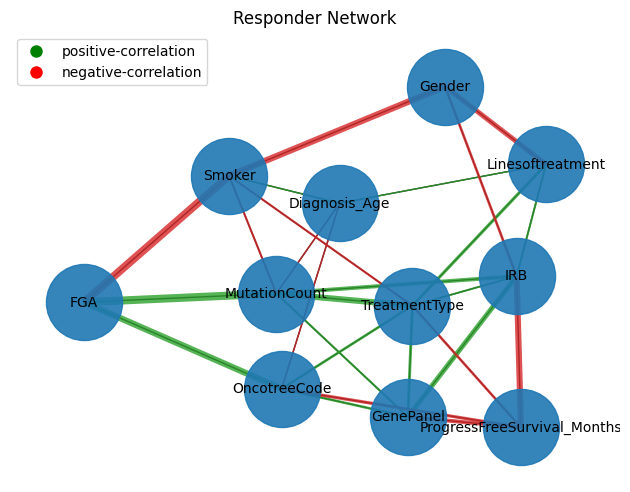

In [114]:
widths = np.array([w for *_, w in G1.edges.data('r1')])
pos = nx.spring_layout(G1, seed=1000)  # positions for all nodes - seed for reproducibi


nx.draw_networkx_nodes(G1, pos, node_size=3000 ,alpha=0.9)

nx.draw_networkx_edges(G1, pos, width=1.0, alpha=0.9)

nx.draw_networkx_edges(
    G1,
    pos,
    width=widths*10,
    edgelist= g1pos,
    alpha=0.8,
    edge_color="tab:green",
)

nx.draw_networkx_edges(
    G1,
    pos,
    edgelist=g1neg,
    width=widths*10,
    alpha=0.8,
    edge_color="tab:red",
)


nx.draw_networkx_labels(G1, pos, font_size=10, font_family="sans-serif")

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='positive-correlation',markerfacecolor='g', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='negative-correlation',markerfacecolor='r', markersize=10),        
]

plt.legend(handles=legend_elements, loc='upper left')

ax = plt.gca()
ax.margins(.100)
plt.axis("off")
plt.tight_layout()
plt.title('Responder Network', fontsize=12)

---------------------
Graph of NonResponder
---------------------

In [31]:
nonRespos = nonResponderCorr[nonResponderCorr['r2']>0]
nonResneg = nonResponderCorr[nonResponderCorr['r2']<0]

G2 = nx.from_pandas_edgelist(nonResponderCorr, source='Node1', target='Node2',
                            edge_attr=('r2')
                            )

G2pos = nx.from_pandas_edgelist(nonRespos, source='Node1', target='Node2',
                            edge_attr=('r2')
                            )

G2neg = nx.from_pandas_edgelist(nonResneg, source='Node1', target='Node2',
                            edge_attr=('r2')
                            )

g2pos= G2pos.edges() #edges of positive z-scores

g2neg= G2neg.edges() #edges of negative z-scores

Text(0.5, 1.0, 'NonResponder Network')

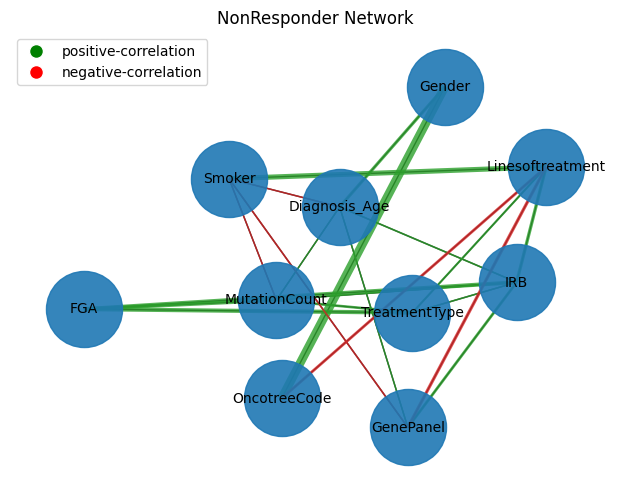

In [117]:
widths = np.array([w for *_, w in G2.edges.data('r2')])
pos = nx.spring_layout(G1, seed=1000)  # positions for all nodes - seed for reproducibi


nx.draw_networkx_nodes(G2, pos, node_size=3000 ,alpha=0.9)

nx.draw_networkx_edges(G2, pos, width=1.0, alpha=0.9)

nx.draw_networkx_edges(
    G2,
    pos,
    width=widths*10,
    edgelist= g2pos,
    alpha=0.8,
    edge_color="tab:green",
)

nx.draw_networkx_edges(
    G2,
    pos,
    edgelist=g2neg,
    width=widths*10,
    alpha=0.8,
    edge_color="tab:red",
)


nx.draw_networkx_labels(G2, pos, font_size=10, font_family="sans-serif")

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='positive-correlation',markerfacecolor='g', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='negative-correlation',markerfacecolor='r', markersize=10),        
]

plt.legend(handles=legend_elements, loc='upper left')

ax = plt.gca()
ax.margins(.100)
plt.axis("off")
plt.tight_layout()
plt.title('NonResponder Network', fontsize=12)

-----------------
Graph of DiffNet
-----------------

In [121]:
diffpos = diffNet[diffNet['Z-score']>0]
diffneg = diffNet[diffNet['Z-score']<0]

G3 = nx.from_pandas_edgelist(diffNet, source='Node1', target='Node2',
                            edge_attr=('Z-score')
                            )

G3pos = nx.from_pandas_edgelist(diffpos, source='Node1', target='Node2',
                            edge_attr=('Z-score')
                            )

G3neg = nx.from_pandas_edgelist(diffneg, source='Node1', target='Node2',
                            edge_attr=('Z-score')
                            )

g3pos= G3pos.edges() #edges of positive z-scores

g3neg= G3neg.edges() #edges of negative z-scores

Text(0.5, 1.0, 'Differential Network')

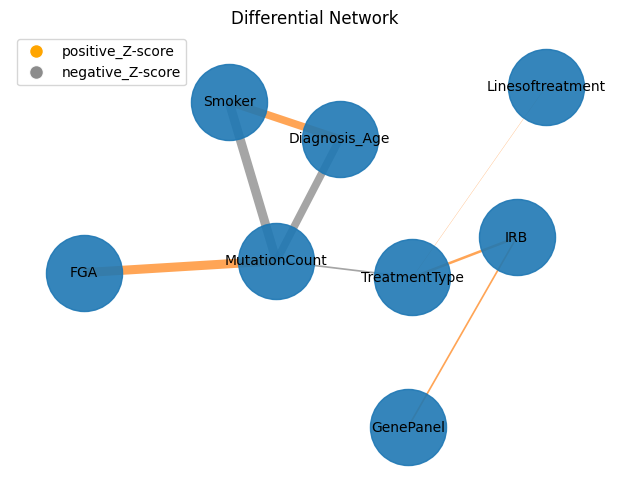

In [178]:
widths = np.array([w for *_, w in G3.edges.data('Z-score')])
pos = nx.spring_layout(G1, seed=1000)  # positions for all nodes - seed for reproducibi

nx.draw_networkx_nodes(G3, pos, node_size=3000 ,alpha=0.9)
#nx.draw_networkx_edges(G3, pos, width=1.0, alpha=1)
nx.draw_networkx_edges(
    G3,
    pos,
    width=widths*3,
    edgelist= g3pos,
    alpha=0.7,
    edge_color="tab:orange",
)
nx.draw_networkx_edges(
    G3,
    pos,
    edgelist=g3neg,
    width=widths*3,
    alpha=0.7,
    edge_color="tab:grey",
)
nx.draw_networkx_labels(G3, pos, font_size=10, font_family="sans-serif")


ax = plt.gca()
ax.margins(.100)
plt.axis("off")
plt.tight_layout()

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='positive_Z-score',markerfacecolor='orange', markersize=10, alpha=1),
    Line2D([0], [0], marker='o', color='w', label='negative_Z-score',markerfacecolor='grey', markersize=10, alpha=0.9),        
]

plt.legend(handles=legend_elements, loc='upper left')
plt.title('Differential Network', fontsize=12)